In [1]:
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import itertools

mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [19]:
def view_images(images, assigned_labels, correct_labels, num_rows, num_columns):
    """
    Displays all images. The assigned label is red if it does not match the correct label and is black otherwise.
    """
    fig = plt.figure()
    for i in xrange(num_rows*num_columns):
        ax = fig.add_subplot(num_rows,num_columns,i+1)
        image = np.reshape(images[i], [28, 28])
        assigned_label = assigned_labels[i]
        correct_label = correct_labels[i]
        plt.title(assigned_label)
        if assigned_label != correct_label:
            ax.title.set_color('red')
        plt.imshow(image, cmap=plt.cm.gray)
        ax.yaxis.set_visible(False)
        ax.xaxis.set_visible(False)
    plt.tight_layout()


def view_incorrect(images, assigned_labels, correct_labels, num_rows, num_columns):
    """
    Displays only those images that are incorrect.
    """
    mask = (assigned_labels != correct_labels)
    im_sub = list(itertools.compress(images, mask))
    al_sub = list(itertools.compress(assigned_labels, mask))
    cl_sub = list(itertools.compress(correct_labels, mask))
    view_images(im_sub, al_sub, cl_sub, num_rows, num_columns)


def one_hot_to_index(labels):
    return np.argmax(labels, 1)

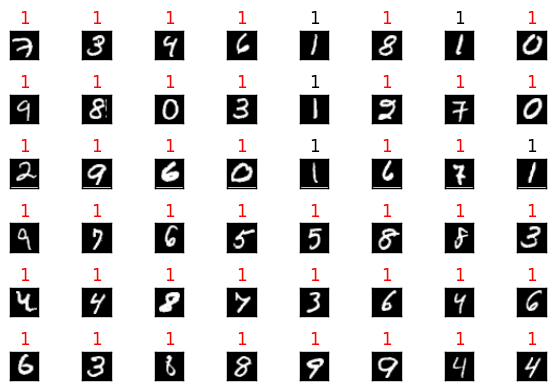

In [23]:
assigned_labels = np.ones([55000]).astype(int) # We use the naive classifier that assigns the label 1 to every image
correct_labels = one_hot_to_index(mnist.train.labels)

view_images(mnist.train.images, assigned_labels, correct_labels, 6, 8)

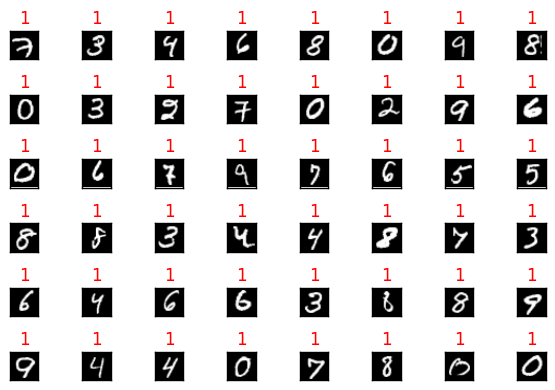

In [24]:
view_incorrect(mnist.train.images, assigned_labels, correct_labels, 6, 8)